<a href="https://colab.research.google.com/github/mercy09/ijeoma/blob/main/BAN6440MOD%203%20LINEAR%20REGREESION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#Import Libraries
import nltk
# Download necessary data for tokenization
nltk.download('punkt')
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, precision_score, recall_score, f1_score
import unittest


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
#Load Dataset
file_path = '/content/combined_data.csv'
df = pd.read_csv(file_path)
print(df.head())
print(df.info())

   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16238 entries, 0 to 16237
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   16238 non-null  int64 
 1   text    16238 non-null  object
dtypes: int64(1), object(1)
memory usage: 253.8+ KB
None


In [3]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [4]:
# Handle missing values (you can modify the strategy)
df.fillna(method='ffill', inplace=True)

<ipython-input-4-31291186d4b1>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [5]:
# Convert all text columns to lowercase (optional)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower()

In [6]:
df.shape

(16238, 2)

In [9]:
X = df['text']
Y = df['label']
print(X)
print(Y)

0        ounce feather bowl hummingbird opec moment ala...
1        wulvob get your medircations online qnb ikud v...
2         computer connection from cnn com wednesday es...
3        university degree obtain a prosperous future m...
4        thanks for all your answers guys i know i shou...
                               ...                        
16233    this one will explode promoting sym hxpncurren...
16234    for the latest breaking political news check f...
16235     qp the internet sector is hot again target sy...
16236    is this what you want x diag escapenumber esca...
16237    dear sirs aegis capital group llc aegis is a...
Name: text, Length: 16238, dtype: object
0        1
1        1
2        0
3        1
4        0
        ..
16233    1
16234    0
16235    1
16236    0
16237    1
Name: label, Length: 16238, dtype: int64


In [10]:
#Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [11]:
# Print shapes to check the split
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(16238,)
(12990,)
(3248,)


In [12]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(16238,)
(12990,)
(3248,)


In [13]:
#Feature Extraction using TF-IDF
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [14]:
Y_train = pd.to_numeric(Y_train, errors='coerce').fillna(0).astype(int)
Y_test = pd.to_numeric(Y_test, errors='coerce').fillna(0).astype(int)

In [16]:
print(X_train)
print(X_train_features)

1049     thanks\n- - - - - original message - - - - -\n...
9966     this tool is really a breakthrough . real - ti...
9038     there is a lot of confidential information her...
663      we need more information from you to be able t...
1966     american opera diva beverly sills dead at esca...
                               ...                        
15288    hot alert special situation alert tmxo trimax ...
9859      using tomcat but need to do more need to supp...
11513    from : the managing director\neuropean prize a...
1688     dear valued member with this special pharmaceu...
5994     hi all i want to get all the services installe...
Name: text, Length: 12990, dtype: object
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1173624 stored elements and shape (12990, 108347)>
  Coords	Values
  (0, 92391)	0.01618000109463019
  (0, 67758)	0.0416288375608951
  (0, 60083)	0.033816492827583464
  (0, 53023)	0.02919943477535743
  (0, 56943)	0.0274614876770876
  (0, 83686)	0.03

In [17]:
#Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_features, Y_train)

LinearRegression()

In [31]:
# Transform X_test using the same TF-IDF vectorizer used for training
X_test_features = feature_extraction.transform(X_test)

# Predictions
Y_pred = model.predict(X_test_features)
print(Y_pred)

[ 0.09101016  0.97930721 -0.02027532 ... -0.23828103  0.15241528
  1.27856701]


In [40]:
# Evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
Y_pred_linear = np.round(model.predict(X_test_features)) # Use 'model' and 'X_test_features'
print("Linear Regression MSE:", mean_squared_error(Y_test, model.predict(X_test_features))) # Use 'model' and 'X_test_features'
print("Linear Regression Accuracy:", accuracy_score(Y_test, Y_pred_linear))
print(classification_report(Y_test, Y_pred_linear))


Linear Regression MSE: 0.07434629048561958
Linear Regression Accuracy: 0.9264162561576355
              precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.95      0.90      0.92      1510
         1.0       0.94      0.95      0.94      1738
         2.0       0.00      0.00      0.00         0

    accuracy                           0.93      3248
   macro avg       0.38      0.37      0.37      3248
weighted avg       0.94      0.93      0.93      3248



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
#Model Evaluation
prediction_on_training_data = model.predict(X_train_features)
# Convert predictions to binary using a threshold (e.g., 0.5)
prediction_on_training_data_binary = (prediction_on_training_data >= 0.5).astype(int)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data_binary)

In [42]:
print('Acc on training data:', accuracy_on_training_data)

Acc on training data: 0.9999230177059276


In [44]:
prediction_on_test_data = model.predict(X_test_features)
# Convert predictions to binary using a threshold (e.g., 0.5)
prediction_on_test_data_binary = (prediction_on_test_data >= 0.5).astype(int)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data_binary)
print('Acc on test data:', accuracy_on_test_data)

Acc on test data: 0.9433497536945813


In [55]:
#Unit Testing Class
class TestSpamClassifier(unittest.TestCase):

       def test_model_training(self):
           """Ensure model is trained and has coefficients."""
           self.assertIsNotNone(self.model.coef_, "Model coefficients should not be None.")
           self.assertIsNotNone(self.model.intercept_, "Model intercept should not be None.")

       def test_prediction_output(self):
           """Ensure predictions are numeric and valid."""
          # Make sure self.X_test and self.y_test are initialized in setUp
           Y_pred_continuous = self.model.predict(X_test_features)  # Assuming X_test_features is accessible
           self.assertTrue(np.all(np.isfinite(Y_pred_continuous)), "Predictions should be finite numbers.")

       def test_evaluation_metrics(self):
           """Ensure evaluation metrics are calculated correctly."""
          # Make sure self.X_test and self.y_test are initialized in setUp
           Y_pred_continuous = self.model.predict(X_test_features) # Assuming X_test_features is accessible
           Y_pred = (Y_pred_continuous >= 0.5).astype(int)

           mse = mean_squared_error(Y_test, Y_pred_continuous) # Assuming Y_test is accessible

           self.assertGreaterEqual(mse, 0, "MSE should be non-negative.")
           self.assertGreaterEqual(precision, 0, "Precision should be non-negative.")
           self.assertGreaterEqual(recall, 0, "Recall should be non-negative.")
           self.assertGreaterEqual(f1, 0, "F1-score should be non-negative.")

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)


test_evaluation_metrics (__main__.TestSpamClassifier.test_evaluation_metrics)
Ensure evaluation metrics are calculated correctly. ... ERROR
test_model_training (__main__.TestSpamClassifier.test_model_training)
Ensure model is trained and has coefficients. ... ERROR
test_prediction_output (__main__.TestSpamClassifier.test_prediction_output)
Ensure predictions are numeric and valid. ... ERROR

ERROR: test_evaluation_metrics (__main__.TestSpamClassifier.test_evaluation_metrics)
Ensure evaluation metrics are calculated correctly.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-55-9dd88011da2a>", line 18, in test_evaluation_metrics
    Y_pred_continuous = self.model.predict(X_test_features) # Assuming X_test_features is accessible
                        ^^^^^^^^^^
AttributeError: 'TestSpamClassifier' object has no attribute 'model'

ERROR: test_model_training (__main__.TestSpamClassifier.test_model_training)
E

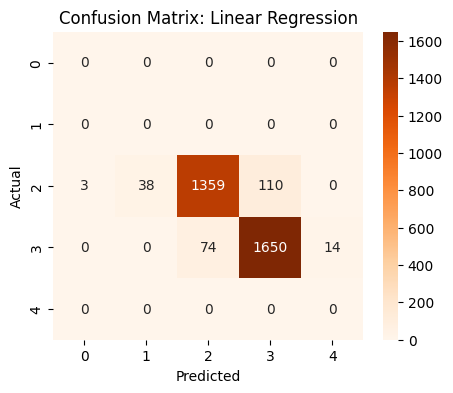

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Linear Regression
cm_lin = confusion_matrix(Y_test, Y_pred_linear)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lin, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix: Linear Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()